![example](images/director_shot.jpeg)

# Movie Analysis

**Authors:** David Adeola
***

## Overview

This project uses descriptive statistical analysis on data gathered from IMDb website to gain insight into which combination of genres topped the league in these areas. Our analysis utilized three datasets encompassing ratings and votes, movie details, and box office gross revenues. After data cleaning, preparation, and exploratory data analysis, we identified that the genres Adventure, Animation, and Comedy have been the most successful in both domestic and foreign markets over the last five years. Additional promising genres include Action, Adventure, Sci-Fi, Action, Adventure, Fantasy, Action, Adventure, Comedy, and Action, Adventure, Thriller, which also demonstrate robust financial success and popularity.

Based on these findings, it is recommended that Microsoft's new movie studio primarily focus on producing Adventure films, as they are the most successful genre. Additionally, leveraging combinations such as Adventure, Animation, Comedy and Action, Adventure, Sci-Fi can capitalize on strong audience interest and substantial box office revenues. This strategy aligns with current market trends and audience preferences, positioning the studio for success in the competitive movie industry.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I am charged with exploring what types of films are currently doing the best at the box office. I have translated those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


## Data Understanding

The data analysed came from IMDb website. IMDb (an acronym for Internet Movie Database) is a popular worldwide online database of infomation relating to all movies, television programs, video games and streaming content online. I used 3 files from IMDb to answer the question of which genres were most successful, mainly focusing on the Domestic and Foreign Gross sales along with average ratings given. I also compared the total gross to the genres in the last few years.


In [5]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
# Here you run your code to explore the data
ratings = pd.read_csv('/content/sample_data/title.ratings.csv')
basics = pd.read_csv('/content/sample_data/title.basics.csv')
movie_gross = pd.read_csv('/content/sample_data/bom.movie_gross.csv')

In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [10]:
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [12]:
basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


## Data Preparation



### Merging Datasets

After analysing the data, basic and ratings have a 1:1 mapping compatibility as they share a common column tconst.

In [13]:
#merge basics and ratings
basics_ratings = pd.merge(basics, ratings, on='tconst')

I merged the two datasets by adding a reference 'tconst' which derives from basics if basics 'primary_title' matches movie_gross 'title'.




### Cleaning Data

I dropped unnecessary columns primary_title, original title as they were duplicates of title. I also dropped studio as it was not relevant to my analysis. I converted domestic gross, foreign gross to numerals and removed null values.

In [14]:
# Here you run your code to clean the data
movie_gross_basics_ratings = pd.merge(movie_gross, basics_ratings, left_on='title', right_on='primary_title').sort_values(by='start_year', ascending=False)

movie_gross_basics_ratings.drop(columns=['primary_title', 'original_title', 'title', 'studio' ], inplace=True)

#convert columns domestic_gross and foreign_gross to numeric types
movie_gross_basics_ratings['domestic_gross'] = pd.to_numeric(movie_gross_basics_ratings['domestic_gross'], errors='coerce') / 1000000 # Handle errors by converting invalid values to NaN
movie_gross_basics_ratings['foreign_gross'] = pd.to_numeric(movie_gross_basics_ratings['foreign_gross'].str.replace(',', ''), errors='coerce') / 1000000 # Remove commas before conversion

#drop rows where domestic_gross or foreign_gross is not a number
movie_gross_basics_ratings.dropna(subset=['domestic_gross', 'foreign_gross', 'runtime_minutes', 'genres'], inplace=True)


#add a new column total_gross
movie_gross_basics_ratings['total_gross'] = movie_gross_basics_ratings['domestic_gross'] + movie_gross_basics_ratings['foreign_gross']
movie_gross_basics_ratings.info()



movie_gross_basics_ratings.head()




<class 'pandas.core.frame.DataFrame'>
Index: 1767 entries, 165 to 0
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   domestic_gross   1767 non-null   float64
 1   foreign_gross    1767 non-null   float64
 2   year             1767 non-null   int64  
 3   tconst           1767 non-null   object 
 4   start_year       1767 non-null   int64  
 5   runtime_minutes  1767 non-null   float64
 6   genres           1767 non-null   object 
 7   averagerating    1767 non-null   float64
 8   numvotes         1767 non-null   int64  
 9   total_gross      1767 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 151.9+ KB


,domestic_gross,foreign_gross,year,tconst,start_year,runtime_minutes,genres,averagerating,numvotes,total_gross
165,3.6000,1.1000,2010,tt6168914,2019,108.0,Adventure,9.2,47,4.7000
58,60.0000,52.4000,2010,tt7906260,2019,86.0,Horror,2.6,64,112.4000
586,0.0057,0.0051,2011,tt8553606,2019,106.0,"Comedy,Drama,Romance",7.5,200,0.0108
2102,1.3000,96.2000,2016,tt10075374,2019,93.0,Action,8.3,6,97.5000
325,28.1000,54.0000,2011,tt7867360,2019,106.0,"Action,Sci-Fi",6.1,1592,82.1000


In [20]:
movie_gross_basics_ratings.describe()

,domestic_gross,foreign_gross,year,start_year,runtime_minutes,averagerating,numvotes,total_gross
count,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1.767000e+03,1767.000000
mean,50.081029,79.595818,2013.666101,2013.559706,107.895869,6.459706,9.692010e+04,129.676847
std,81.010895,140.364626,2.572505,2.621180,20.105904,0.991033,1.539057e+05,210.336737
min,0.000400,0.000600,2010.000000,2010.000000,3.000000,1.600000,5.000000e+00,0.010800
25%,1.300000,4.900000,2011.000000,2011.000000,95.000000,5.900000,6.392500e+03,10.186100
50%,21.100000,21.500000,2014.000000,2013.000000,106.000000,6.500000,3.987000e+04,48.400000
75%,61.200000,81.950000,2016.000000,2016.000000,119.000000,7.100000,1.171330e+05,148.100000
max,700.100000,946.400000,2018.000000,2019.000000,272.000000,9.200000,1.841066e+06,1405.400000


## Data Modeling


In [15]:
#create a new dataframe of movies grouped by genres

movies_by_genres = movie_gross_basics_ratings.groupby('genres').agg({
    'tconst': 'count',
    'averagerating': 'mean',
    'numvotes': 'mean',
    'total_gross': 'sum',
    'domestic_gross': 'sum',
    'foreign_gross': 'sum',
    'runtime_minutes': 'mean'
})

movies_by_genres.describe()


,tconst,averagerating,numvotes,total_gross,domestic_gross,foreign_gross,runtime_minutes
count,260.000000,260.000000,2.600000e+02,260.000000,260.000000,260.000000,260.000000
mean,6.796154,6.468061,8.960945e+04,881.303802,340.358375,540.945427,106.166840
std,13.160752,0.856897,1.294872e+05,2753.847522,1026.980797,1740.905231,16.862925
min,1.000000,2.100000,8.000000e+00,0.126600,0.000800,0.040700,47.000000
25%,1.000000,6.043750,1.199338e+04,31.905500,5.575000,15.700000,97.191667
50%,2.000000,6.493750,5.665569e+04,173.985150,69.213150,98.500000,106.458065
75%,6.000000,6.968750,1.141582e+05,715.680000,294.000000,408.475000,115.625000
max,115.000000,9.200000,1.211405e+06,27633.902388,11022.499999,17962.199999,165.000000



Plotting the genres by foreign gross, domestic gross and ratings

<Axes: title={'center': 'Top 10 Genres by Ratings'}, xlabel='genres', ylabel='Ratings'>

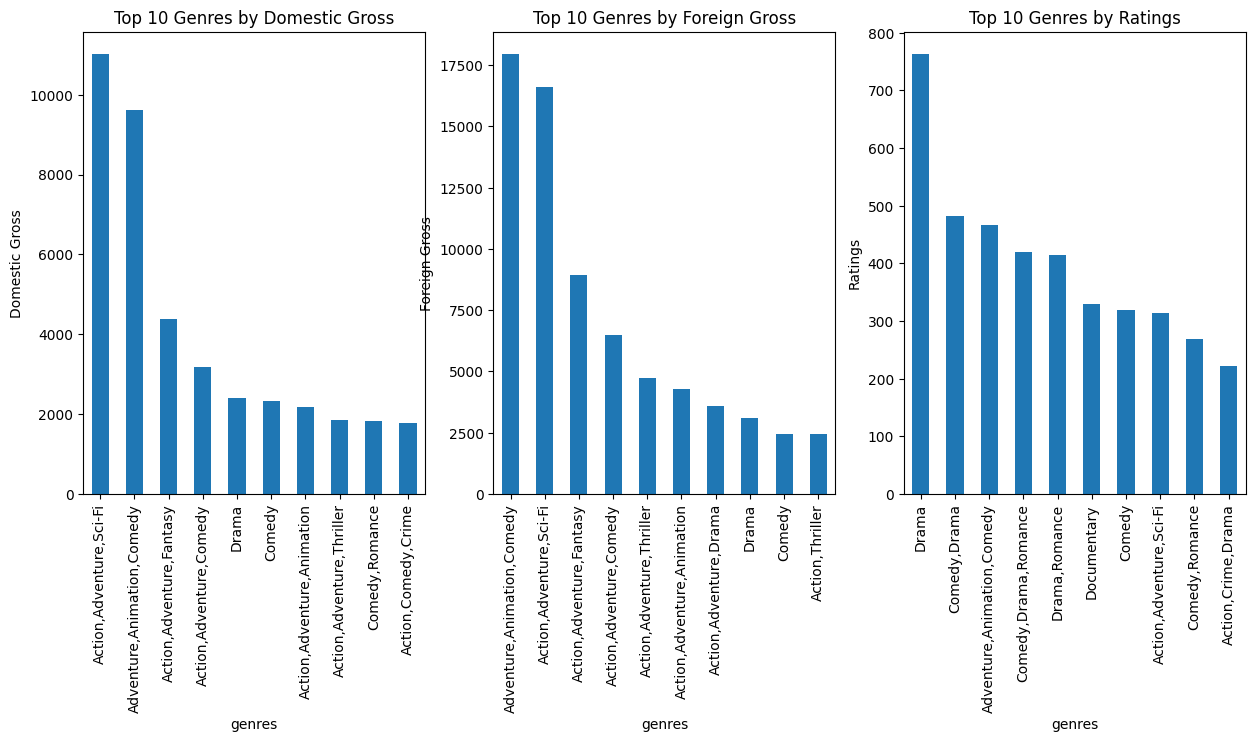

In [16]:
fig, axes = plt.subplots(figsize=(15, 6), nrows=1, ncols=3)

axes[0].set_title('Top 10 Genres by Domestic Gross')
axes[0].set_ylabel('Domestic Gross')
movie_gross_basics_ratings.groupby('genres')['domestic_gross'].sum().sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[0])


axes[1].set_title('Top 10 Genres by Foreign Gross')
axes[1].set_ylabel('Foreign Gross')
movie_gross_basics_ratings.groupby('genres')['foreign_gross'].sum().sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[1])
axes[2].set_title('Top 10 Genres by Ratings')
axes[2].set_ylabel('Ratings')
movie_gross_basics_ratings.groupby('genres')['averagerating'].sum().sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[2])






Aggregated the movies by the top grossing genres and years. I narrowed it down to the most recent 5 years to gain the trending genres.

In [17]:


unique_years = movie_gross_basics_ratings['start_year'].unique()
top_grossing_genres = movie_gross_basics_ratings.groupby('genres')['total_gross'].sum().sort_values(ascending=False).head(5).index

# Create a pivot table with genres as columns and years as rows
movies_by_genres_years = movie_gross_basics_ratings.groupby(['start_year', 'genres']).size().unstack(fill_value=0)

# Reorder columns based on top_grossing_genres
pivoted = movies_by_genres_years.reindex(columns=top_grossing_genres)

# Fill NaN values with 0 (if necessary)
pivoted = pivoted.fillna(0)

pivoted.head()





genres,"Action,Adventure,Sci-Fi","Adventure,Animation,Comedy","Action,Adventure,Fantasy","Action,Adventure,Comedy","Action,Adventure,Thriller"
start_year,,,,,
2010,3,5,1,0,3
2011,5,10,5,1,1
2012,4,8,1,1,3
2013,9,8,2,2,0
2014,5,6,2,3,1


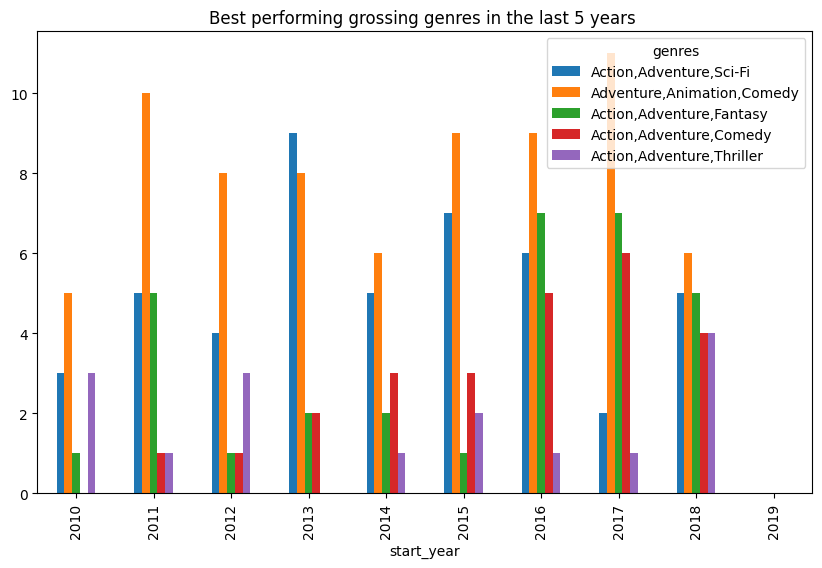

In [18]:
#plot graph of start_year against genres
pivoted.plot(kind='bar', figsize=(10, 6))
plt.title("Best performing grossing genres in the last 5 years ") # Set title using plt.title()
plt.show() # Display the plot

In [19]:
#return the most common genre
pivoted.idxmax(axis=1).value_counts()


Adventure,Animation,Comedy    8
Action,Adventure,Sci-Fi       2
Name: count, dtype: int64

## Evaluation

* 2 of the above graphs, Domestic Gross Sales, Foreign Gross Sales clearly show that Adventure, Action and Sci-Fi combination are most successful in Domestic and Foreign Gross Sales. Its clear also to see that the adventure genre is popular across the board especially when elements of animation, action and or comedy are also included.

* It also shows that the Adventure, Animation, Comedy has been the most grossing combination in recent years.

* The ratings graph also supports that out of the top rated movies, Animation, Adventure and Comedy was among the top rated

## Conclusions
My recommendation for which type of Movie to produce would be Adventure,Animation,Comedy as it is the most successful genre in both domestic and foreign markets in the last 5 years.

Additionally, I also would recommend  these based off their recent performances:
1. Action,Adventure,Sci-Fi,
2. Action,Adventure,Fantasy
3. Action,Adventure,Comedy or Action,Adventure,Thriller

Conclusively, I would recommend making Adventure films which are the most successful


